# Insight: Education and Employment

- This jupyter notebook includes process of generating insights which are related to education and employment.
- The insight generating process is divided into sub-tasks as shown below.
    - 1. Download data
    - 2. Explore data
    - 3. Extract/analyse data
    - 4. Visualize data

## Step 1 : Download data

- All analysed data are uploaded in git repository (https://github.com/soda-lab/data-registry)
- Using python to download the dataset

In [74]:
import pandas as pd

repository = 'https://github.com/soda-lab/data-registry/'
path = 'blob/main/original_data/'
dataset = '14100do0005_2014-19.xlsx?raw=true'
raw = '?raw=ture'

url = repository + path + dataset + raw
xls = pd.ExcelFile(url)

## Step 2: Explore data

In [213]:
# read Table 1 in the dataset

df1 = pd.read_excel(xls, sheet_name = 'Table 1', skiprows=6, header=0, index_col=0)
df = df1.dropna(subset=['Year'], how='all') # drop rows where it contains meaningless values

- Show all columns (n = 153)

In [152]:
# print all columns

list(df.columns)

['Label',
 'Year',
 '4 year olds enrolled in preschool or in a preschool program (no.)',
 '5 year olds enrolled in preschool or in a preschool program (no.)',
 'Total enrolled in preschool (no.)',
 'Enrolled in preschool program within a long day care centre (no.)',
 'Children enrolled across more than one provider type (no.)',
 'Total enrolled in a preschool program (no.)',
 'Children attending preschool for less than 15 hours (no.)',
 'Children attending preschool for 15 hours or more (no.)',
 'Taxpayers with Higher Education Loan Program (HELP) repayment (no.)',
 'Number of Jobs - Females',
 'Number of Jobs - Males',
 'Number of Jobs - Persons',
 'Number of Employee Jobs - Agriculture, forestry and fishing',
 'Number of Employee Jobs - Mining',
 'Number of Employee Jobs - Manufacturing',
 'Number of Employee Jobs - Electricity, gas water and waste services',
 'Number of Employee Jobs - Construction',
 'Number of Employee Jobs - Wholesale trade',
 'Number of Employee Jobs - Retail tr

In [91]:
# print shape of dataframe

df.shape

(19229, 88)

- The data contains 19,229 rows with 88 atrributes

In [94]:
# print first 5 rows in dataframe

df.head()

,Label,Year,4 year olds enrolled in preschool or in a preschool program (no.),5 year olds enrolled in preschool or in a preschool program (no.),Total enrolled in preschool (no.),Enrolled in preschool program within a long day care centre (no.),Children enrolled across more than one provider type (no.),Total enrolled in a preschool program (no.),Children attending preschool for less than 15 hours (no.),Children attending preschool for 15 hours or more (no.),...,Total population aged 15 years and over (no.),Managers (%),Professionals (%),Technicians and trades workers (%),Community and personal service workers (%),Clerical and administrative workers (%),Sales workers (%),Machinery operators and drivers (%),Labourers (%),Occupation of Employed Persons - Inadequately described (%)
Code,,,,,,,,,,,,,,,,,,,,,
0,Australia,2011.0,-,-,-,-,-,-,-,-,...,17363696,12.9,21.3,14.2,9.7,14.7,9.4,6.6,9.4,1.9
0,Australia,2014.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,Australia,2015.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0,Australia,2016.0,268458,62215,144580,161029,25065,330676,71164,246861,...,19037277,13,22.2,13.5,10.8,13.6,9.4,6.3,9.5,1.7
0,Australia,2017.0,274114,65131,144602,168049,26590,339243,69657,255467,...,-,-,-,-,-,-,-,-,-,-


## Step3: Extract/analyse data

- Extract data 
    - columns (The highest year of school completion)
    - rows (state and territory)
    - Year = 2016 ( It is the newest year where no missing value in the row)

In [214]:
defined_columns = [
    'Label', 
    'Year',
    'Completed Year 8 or below (%)',
    'Completed Year 9 or equivalent (%)',
    'Completed Year 12 or equivalent (%)',
    'Completed Year 11 or equivalent (%)',
    'Completed Year 10 or equivalent (%)',
    'Did not go to school (%)',
    'Highest Year of School Completed - Not stated (%)',
    ]

In [215]:
defined_rows = [
    'New South Wales', 
    'Victoria',
    'Queensland',
    'South Australia',
    'Western Australia',
    'Tasmania',
    'Northern Territory',
    'Australian Capital Territory'
]

In [216]:
defined_year = 2016

In [217]:
# extract data based on the defined rows columns and year

extracted_df = pd.DataFrame(columns=['Label'])

df = df[defined_columns] # extract data by columns
for index, row in df.iterrows():
    if row['Label'] in defined_rows and row['Year'] == defined_year: # extract data by rows and year
        extracted_df = extracted_df.append(row)    

extracted_df.Year = extracted_df.Year.astype(int) # convert data type to int
extracted_df = extracted_df.drop_duplicates(subset=['Label', 'Year'])
# remove duplications

In [218]:
# print extracted data

extracted_df

,Label,Completed Year 10 or equivalent (%),Completed Year 11 or equivalent (%),Completed Year 12 or equivalent (%),Completed Year 8 or below (%),Completed Year 9 or equivalent (%),Did not go to school (%),Highest Year of School Completed - Not stated (%),Year
1,New South Wales,21.6,5.8,52.1,4.6,6.3,1.0,8.5,2016
2,Victoria,13.2,11.6,54.4,5.6,5.8,1.1,8.2,2016
3,Queensland,22.7,7.8,50.5,4.8,4.8,0.5,9.0,2016
4,South Australia,15.8,17.4,47.4,5.4,5.4,0.9,7.6,2016
5,Western Australia,20.6,10.0,51.7,3.2,4.5,0.6,9.4,2016
6,Tasmania,30.5,8.7,38.3,4.9,8.2,0.4,8.9,2016
7,Northern Territory,17.3,11.5,42.9,5.9,5.4,1.2,15.8,2016
8,Australian Capital Territory,12.9,4.8,69.4,2.4,3.4,0.4,6.7,2016


## Step4: Visualize data

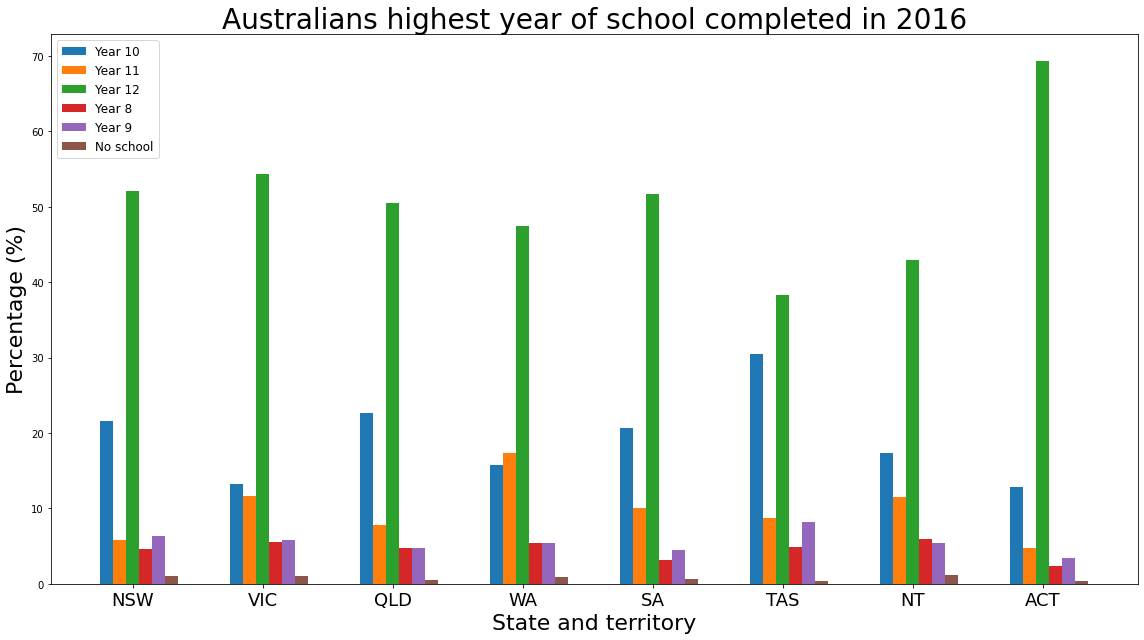

In [257]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

year_10 = tuple(extracted_df.iloc[:, 1])
year_11 = tuple(extracted_df.iloc[:, 2])
year_12 = tuple(extracted_df.iloc[:, 3])
year_8 = tuple(extracted_df.iloc[:, 4])
year_9 = tuple(extracted_df.iloc[:, 5])
no_school = tuple(extracted_df.iloc[:, 6])


ind = np.arange(len(NSW))  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, year_10, width/2,
                label='Year 10')
rects2 = ax.bar(ind - width/2, year_11, width/2,
                label='Year 11')
rects3 = ax.bar(ind , year_12, width/2,
                label='Year 12')
rects4 = ax.bar(ind + width/2, year_8, width/2,
                label='Year 8')
rects5 = ax.bar(ind + width, year_9, width/2,
                label='Year 9')
rects6 = ax.bar(ind + width*1.5, no_school, width/2,
                label='No school')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('State and territory', fontsize=22)
ax.set_ylabel('Percentage (%)', fontsize=22)
ax.set_title('Australians highest year of school completed in 2016', fontsize=28)
ax.set_xticks(ind)
ax.set_xticklabels(('NSW', 'VIC', 'QLD', 'WA', 'SA', 'TAS', 'NT', 'ACT'), fontsize=18)
ax.legend(fontsize=12)

fig.set_size_inches(16, 9)
fig.tight_layout()

plt.show()